In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/EC-Earth3-AerChem_diag_2014(0318).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['k_no_ho2'].median()

8.51696079969406e-12

In [6]:
data['k_no_ch3o2'].median()

8.142456424236298e-12

In [7]:
data['k_o3_oh'].median()

6.264362223446369e-14

In [8]:
data['k_o3_ho2'].median()

1.8237333652759167e-15

In [9]:
data['k_ch3o2_ch3o2'].median()

3.7109935488520403e-13

In [10]:
data['a'] = 2*data['k_ho2_ho2']
data['b'] = data['k_o3_ho2']*data['o3_mole'] + data['k_no_ho2']*data['no_mole']
data['c'] = -data['lossco_mole'] - data['k_o3_oh']*data['o3_mole']*data['oh_mole']

In [11]:
data['ho2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [12]:
data['ho2_mole'].describe()

count    1.944000e+05
mean     1.048462e+08
std      1.108927e+08
min      8.014530e+03
25%      1.455481e+07
50%      6.043853e+07
75%      1.770183e+08
max      5.426603e+08
Name: ho2_mole, dtype: float64

In [13]:
data['oh_mole'].describe()

count    1.944000e+05
mean     1.013119e+06
std      1.043842e+06
min      3.625931e+01
25%      1.484290e+05
50%      6.396672e+05
75%      1.717572e+06
max      1.227739e+07
Name: oh_mole, dtype: float64

In [14]:
data['ratio_ho2_oh'] = data['ho2_mole']/data['oh_mole']
data['ratio_ho2_oh'].describe()

count    194400.000000
mean        158.027510
std         120.235579
min           0.290393
25%          80.498465
50%         143.731563
75%         200.535510
max         894.304197
Name: ratio_ho2_oh, dtype: float64

In [15]:
data['P1'] = data['k_no_ho2']*data['no_mole']*data['ho2_mole']
data['P1_frac'] = data['P1']/data['o3prod_mole']
data['P1_frac'].describe()

count    194400.000000
mean          0.292835
std           0.177434
min           0.001869
25%           0.136812
50%           0.326595
75%           0.405088
max           0.882953
Name: P1_frac, dtype: float64

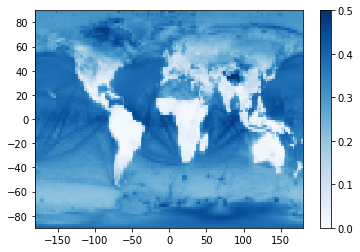

In [16]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
#data_land = data_land[data_land['P1_frac'] <1]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P1_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [17]:
data_mean['P1_frac'].describe()

count    16200.000000
mean         0.292835
std          0.107129
min          0.005177
25%          0.247878
50%          0.312279
75%          0.376455
max          0.600819
Name: P1_frac, dtype: float64

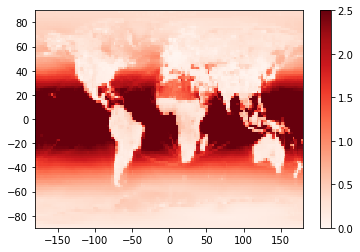

In [18]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ho2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=2.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [19]:
data = data.drop(['a','b','c'], axis=1)
data

,longitude,latitude,t,loc,o3,o3loss,o3prod,eminox,emivoc,tas,...,k_oh_no2,o3prod_mole,o3loss_mole,lossch4_mole,lossco_mole,k_ch3o2_ch3o2,ho2_mole,ratio_ho2_oh,P1,P1_frac
0,1.0,-89.0,1.0,911.0,1.918366e-08,5.820803e-14,7.145326e-14,0.000000e+00,0.000000e+00,248.75261,...,6.500000e-11,43029.153172,35052.875666,19090.079641,59857.144390,4.467728e-13,3.885214e+07,101.784625,30090.210674,0.699298
1,3.0,-89.0,1.0,2911.0,1.918366e-08,5.820803e-14,7.145326e-14,0.000000e+00,0.000000e+00,248.71443,...,6.500000e-11,43029.153172,35052.875666,19090.079641,59857.144390,4.468735e-13,3.885756e+07,101.522686,30104.042935,0.699620
2,5.0,-89.0,1.0,4911.0,1.918151e-08,5.803789e-14,7.134267e-14,0.000000e+00,0.000000e+00,248.67625,...,6.500000e-11,42962.555874,34950.417358,19058.552062,59721.348290,4.469742e-13,3.876966e+07,101.060546,30090.507106,0.700389
3,7.0,-89.0,1.0,6911.0,1.917528e-08,5.749123e-14,7.101957e-14,0.000000e+00,0.000000e+00,248.63808,...,6.500000e-11,42767.985054,34621.218706,18891.328348,59424.310129,4.470749e-13,3.860273e+07,100.621826,29993.816573,0.701315
4,9.0,-89.0,1.0,8911.0,1.917528e-08,5.749123e-14,7.101957e-14,0.000000e+00,0.000000e+00,248.59988,...,6.500000e-11,42767.985054,34621.218706,18891.328348,59424.310129,4.471758e-13,3.860376e+07,100.454268,30004.231474,0.701558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194395,-9.0,89.0,12.0,-8911.0,2.716963e-08,1.193308e-14,6.409461e-16,9.685218e-14,7.394706e-15,246.50143,...,6.500000e-11,385.977741,7186.103787,67.746013,439.141884,4.528000e-13,3.626463e+05,592.499409,53.415365,0.138390
194396,-7.0,89.0,12.0,-6911.0,2.717685e-08,1.164388e-14,5.783149e-16,8.234587e-14,6.287143e-15,246.50337,...,6.500000e-11,348.261233,7011.942428,65.885216,424.592654,4.527948e-13,3.569066e+05,587.165702,45.044834,0.129342
194397,-5.0,89.0,12.0,-4911.0,2.719129e-08,6.036053e-15,1.296579e-22,0.000000e+00,0.000000e+00,246.50531,...,6.500000e-11,0.000078,3634.911297,64.693804,412.004374,4.527895e-13,3.857658e+05,634.576032,0.000001,0.018555
194398,-3.0,89.0,12.0,-2911.0,2.719129e-08,6.036053e-15,1.296579e-22,0.000000e+00,0.000000e+00,246.50725,...,6.500000e-11,0.000078,3634.911297,64.693804,412.004374,4.527842e-13,3.860416e+05,624.532871,0.000001,0.018568


In [20]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/EC-Earth3-AerChem_diag_2014(0319).csv', index = False)